In [2]:
# Developed by Samuel Horovatin at the University of Saskatchewan
# July, 2021
%matplotlib inline
from plantcv import plantcv as pcv
import matplotlib

In [3]:
matplotlib.rcParams["figure.figsize"] = [8, 8]
class options:
    def __init__(self):
        # Input image path/filename
        self.image = "/student/sch923/Thesis/data/lentil/17085814-7.png"
        # Debug mode = None, "plot", or "print"
        self.debug = "plot"
        # Store output images (True/False)
        self.writeimg = False
        # Results path/filename
        self.result = "results.txt"
        # Image output directory path
        self.outdir = "."

# Initialize options
args = options()
# Set PlantCV debug mode to input debug method
pcv.params.debug = args.debug
# Increase text size in plots
pcv.params.text_size = 20
pcv.params.text_thickness = 10

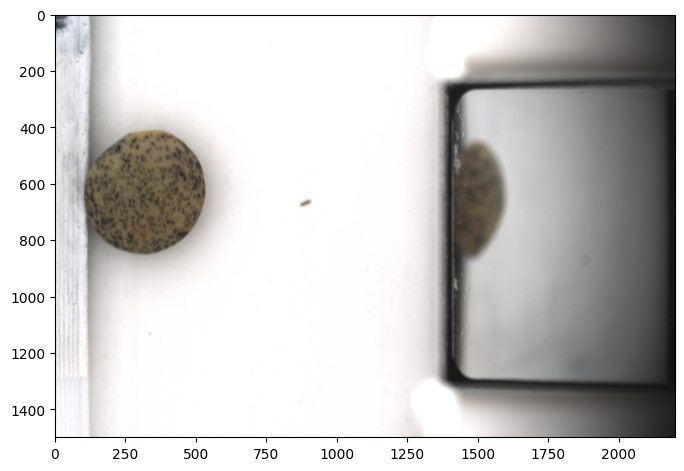

In [4]:
img, path, filename = pcv.readimage(filename=args.image)
img = img[:, :1400, :] #removes mirror

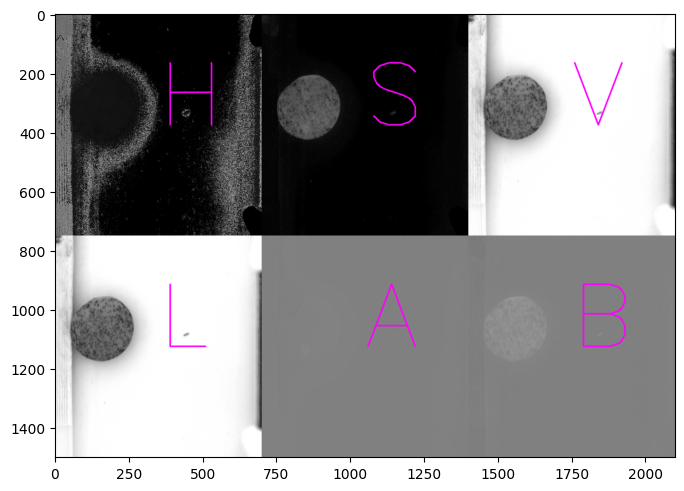

In [5]:
cs_plot = pcv.visualize.colorspaces(rgb_img=img, original_img=False)

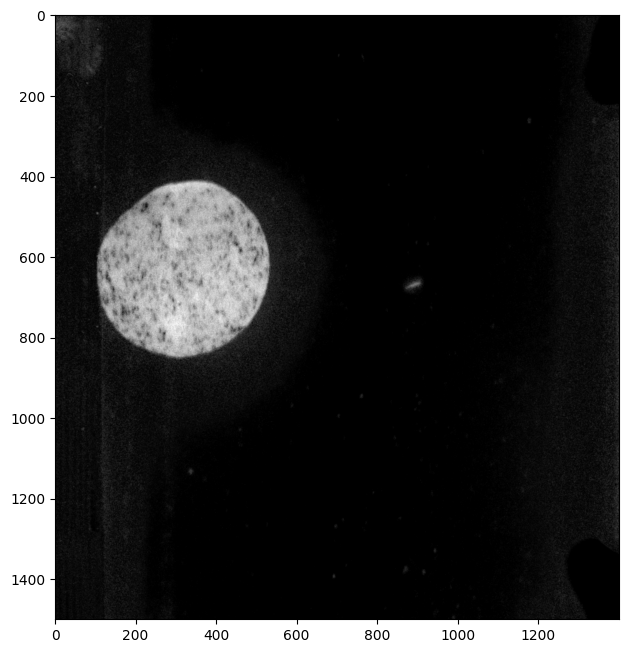

In [6]:
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

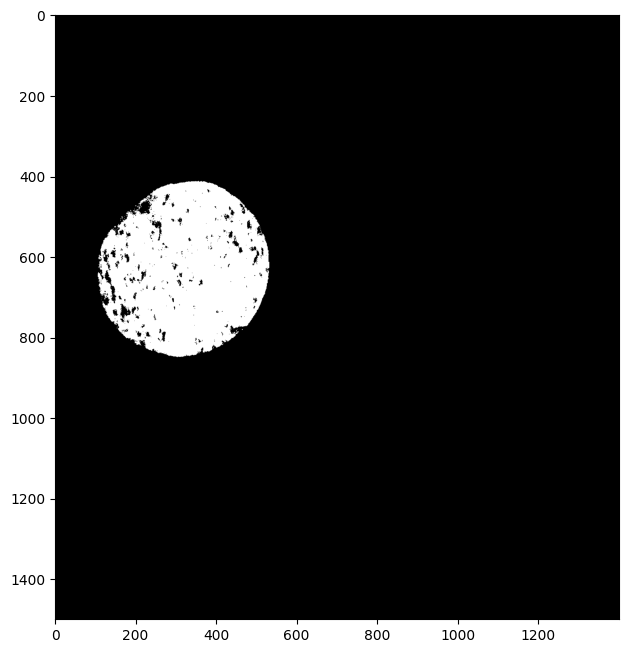

In [30]:
s_thresh = pcv.threshold.binary(gray_img=s, threshold=60, max_value=255, object_type='light') # threshold is 60 to remove little lentil flecks

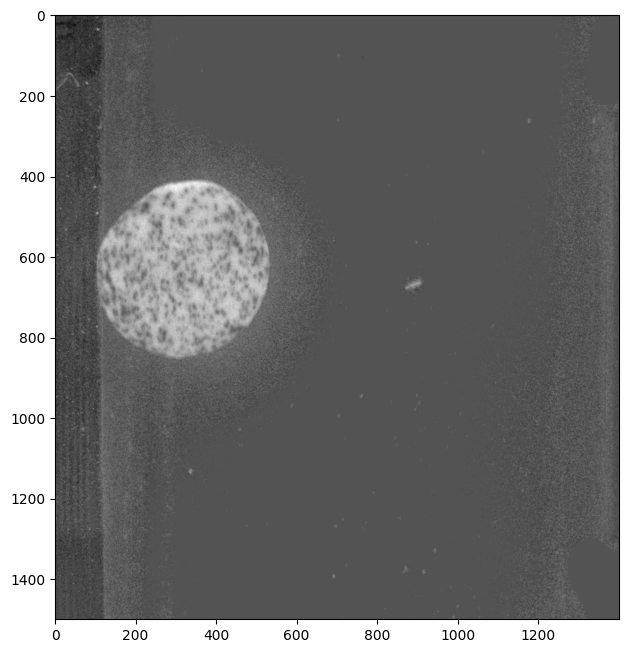

In [31]:
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')

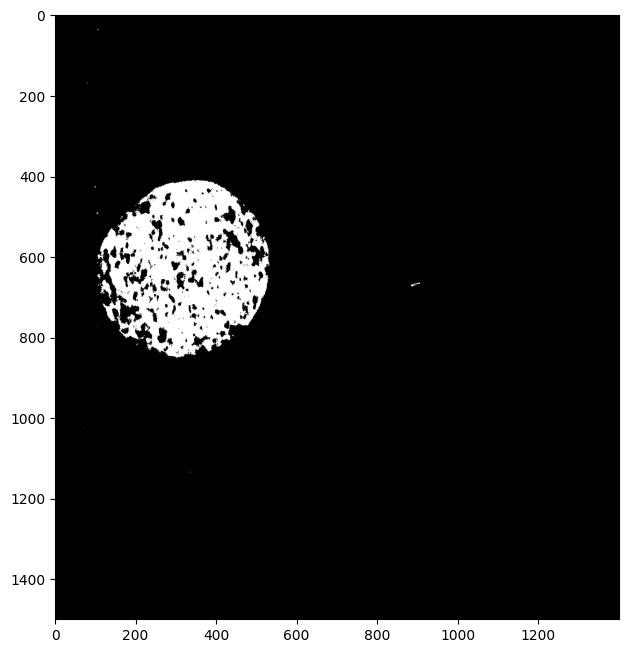

In [32]:
b_thresh = pcv.threshold.binary(gray_img=b, threshold=138, max_value=255, object_type='light')

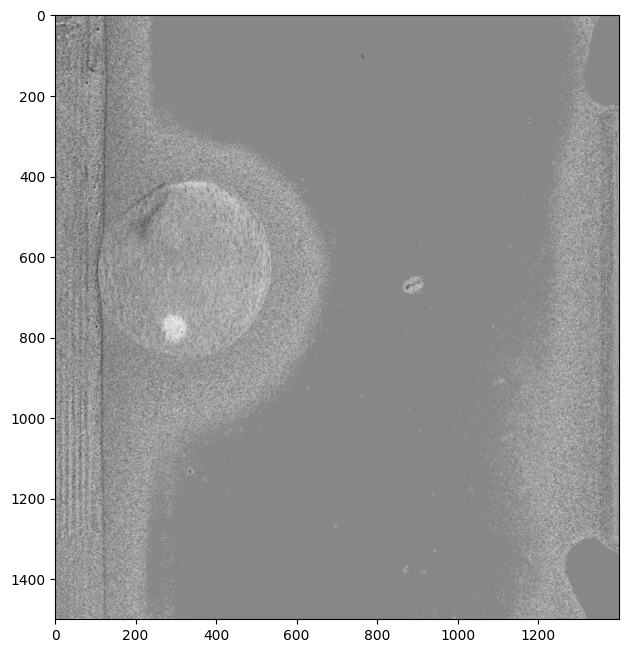

In [33]:
a = pcv.rgb2gray_lab(rgb_img=img, channel='a')

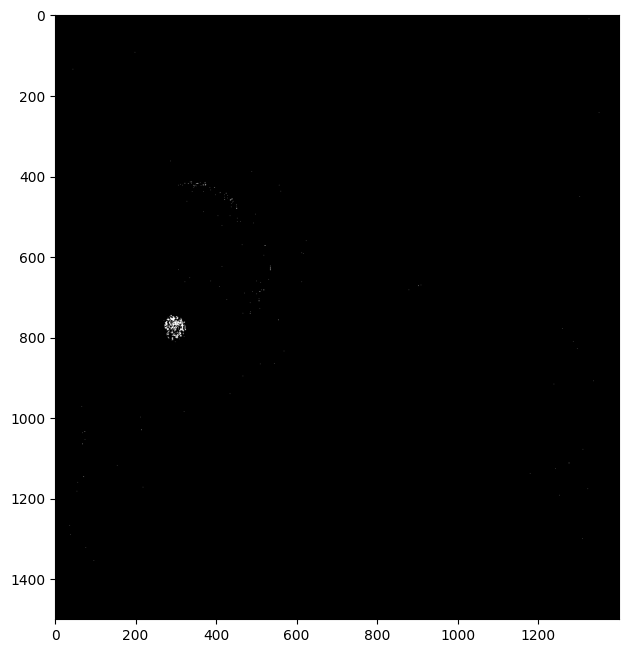

In [34]:
a_thresh = pcv.threshold.binary(gray_img=a, threshold=133, max_value=255, object_type='light')

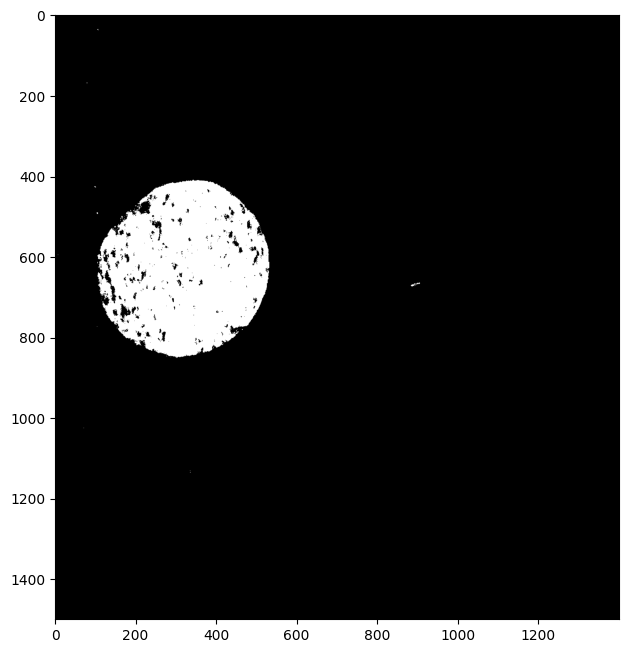

In [35]:
bs = pcv.logical_or(bin_img1=s_thresh, bin_img2=b_thresh)

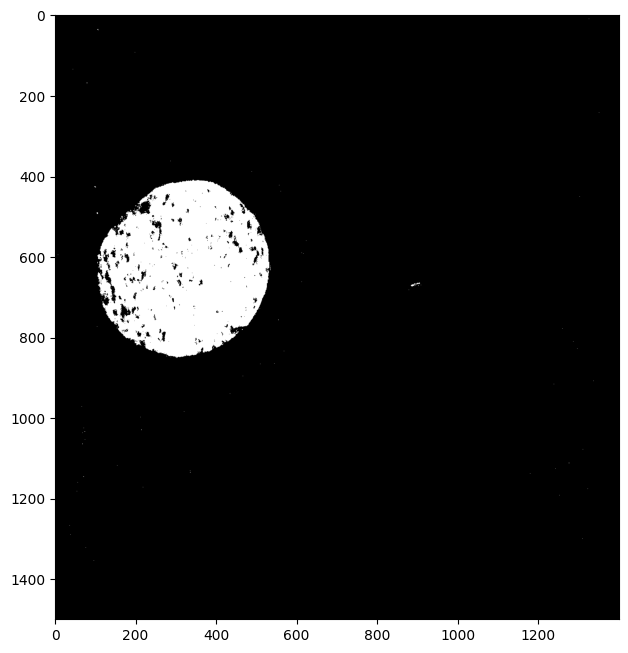

In [36]:
bsa = pcv.logical_or(bin_img1=bs, bin_img2=a_thresh)

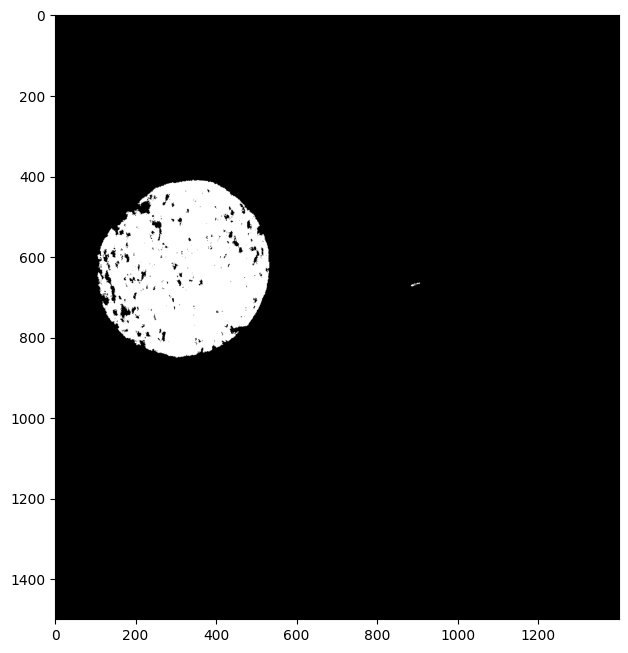

In [37]:
bsa_fill1 = pcv.fill(bin_img=bsa, size=200) # Fill small noise

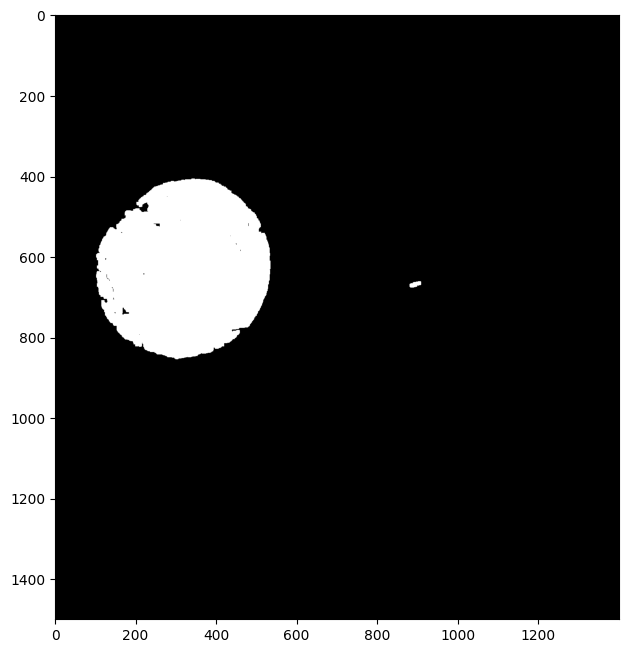

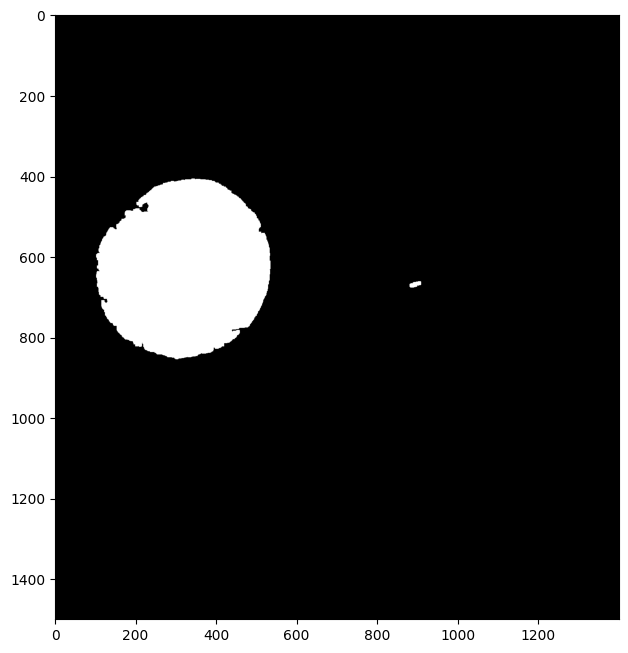

In [38]:
bsa_fill2 = pcv.dilate(gray_img=bsa_fill1, ksize=3, i=3)
filled_mask1 = pcv.fill_holes(bsa_fill2)

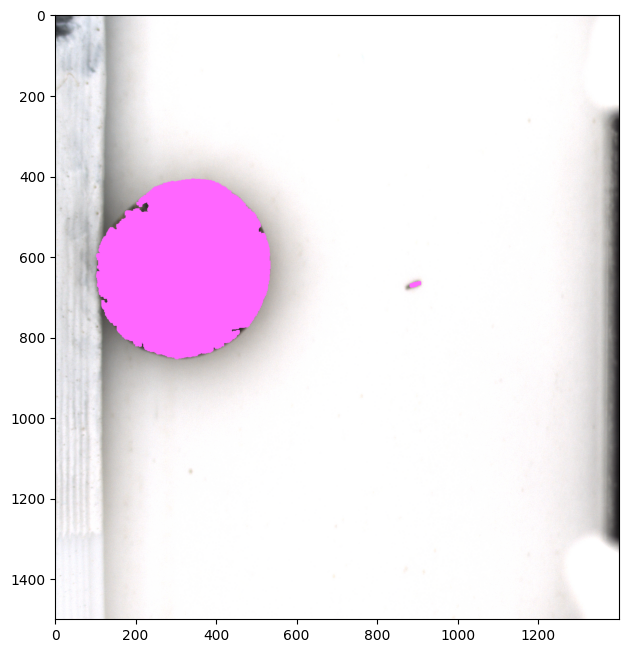

In [39]:
id_objects, obj_hierarchy = pcv.find_objects(img=img, mask=filled_mask1)

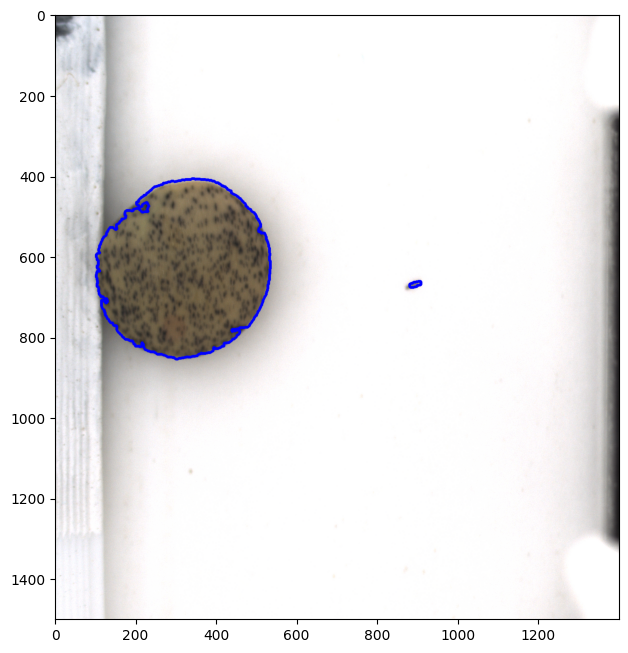

In [40]:
obj, mask = pcv.object_composition(img=img, contours=id_objects, hierarchy=obj_hierarchy)